In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

KeyboardInterrupt: 

In [70]:
# Extraindo o diretório que estamos trabalhando
cwd = os.getcwd()
print('Diretório atual: ' + cwd)

# Estabelecendo a pasta de dados que quero utilizar
dataPath = os.path.dirname(cwd) + '\\ENS410064\\dados'
print('Diretório de dados: ' + dataPath)

Diretório atual: C:\Users\alysson.assis\OneDrive - ARAXA\Documentos\Tópicos especiais-Python in Environmental Applications\ENS410064
Diretório de dados: C:\Users\alysson.assis\OneDrive - ARAXA\Documentos\Tópicos especiais-Python in Environmental Applications\ENS410064\dados


In [71]:
# Listar documentos que estão na pasta de dados
dataList = os.listdir(dataPath)
print(dataList)

['metar_FOR_2023.csv', 'metar_SBFL_2021.csv', 'metar_SBFL_2022.csv', 'metar_SBFL_2023.csv']


In [72]:
# Listando arquivos com o nome iniciando em metar
prefixed = [filename for filename in os.listdir(dataPath) if filename.startswith("metar")]

print(prefixed)

['metar_FOR_2023.csv', 'metar_SBFL_2021.csv', 'metar_SBFL_2022.csv', 'metar_SBFL_2023.csv']


In [73]:
# Extraindo os anos dos dados
# Trabalhando com o nome dos arquivos
years = []
for dl in dataList:
    if os.path.isfile(dataPath+'\\'+dl):
        years.append(dl.split('_')[-1].split('.')[0])
    else:
        print('Não é um arquivo')

years = np.unique(years)
print(years)


# Extraindo as estações de dados
stations = []
for dl in dataList:
    if os.path.isfile(dataPath+'\\'+dl):
        stations.append(dl.split('_')[-2])
    else:
        print('Não é um arquivo')

stations = np.unique(stations)
print(stations)



['2021' '2022' '2023']
['FOR' 'SBFL']


In [74]:
# lendo todos os arquivos da pasta
import pandas as pd

dataAll=[]
for dl in dataList:
    print(dl)
    data = pd.read_csv(dataPath+'\\'+dl)
    dataAll.append(data)

# Concatenando a lista de dados
dataAll = pd.concat(dataAll)
dataAll.head()

metar_FOR_2023.csv
metar_SBFL_2021.csv
metar_SBFL_2022.csv
metar_SBFL_2023.csv


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh
0,1,1,2023,0,NaN,90.0,3.601108,NaN,NaN,NaN,1009.662022,28.0,23.0,NaN,0.0,74.28
1,1,1,2023,1,NaN,100.0,4.629996,640.08,3.0,3.0,1009.662022,28.0,24.0,NaN,0.0,78.90
2,1,1,2023,2,NaN,100.0,4.629996,670.56,3.0,3.0,1009.665616,27.0,24.0,NaN,0.0,83.66
3,1,1,2023,3,NaN,100.0,4.629996,670.56,3.0,3.0,1009.665616,27.0,23.0,NaN,0.0,78.76
4,1,1,2023,4,NaN,110.0,4.629996,670.56,3.0,3.0,1009.669209,27.0,23.0,NaN,0.0,78.76


In [88]:
# Criando uma função para gerar figuras e estastíticas
def statisticsAndFigures (dataAll,st,years,cwd):
    
    from windrose import WindroseAxes
    import matplotlib.dates as mdates
    
    # Criando a pasta das figuras
    os.makedirs(os.path.dirname(cwd) +'\\figuras\\'+st, exist_ok=True)
    
    # Criando uma figura para a estação
    fig, ax = plt.subplots(2)
    ax[0].plot(dataAll.temp,color='red')
    ax[0].set_ylabel('Temperatura (°C)')
    ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    # set formatter
    ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
    ax[0].set_xlim([dataAll.index.min(),dataAll.index.max()])
    ax[1].plot(dataAll.p, color = '#f3c926')
    ax[1].set_ylabel('Pressão atm (mbar)')
    
    fig.suptitle(st)

    # Salvando a figura
    fig.savefig(os.path.dirname(cwd) +'\\figuras\\'+st+'\\timeseries_'+st+'_'+years[0]+'to'+years[-1]+'.png')

    # Criando uma figura para a estação - windrose
    ax = WindroseAxes.from_ax()
    ax.bar(dataAll['wd'], dataAll['ws'], normed=True, opening=0.8, edgecolor="white")
    ax.set_legend()

    # Salvando a figura
    plt.savefig(os.path.dirname(cwd) +'\\figuras\\'+st+'\\windRose_'+st+'_'+years[0]+'to'+years[-1]+'.png')
    
    return fig

FOR
2021
Não tem a estação ou o ano
2022
Não tem a estação ou o ano
2023
SBFL
2021
2022
2023


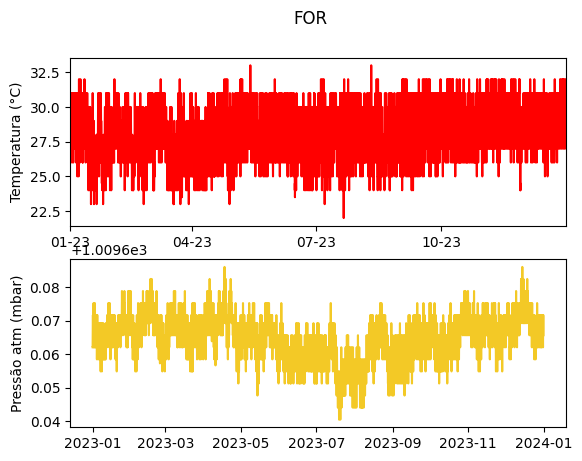

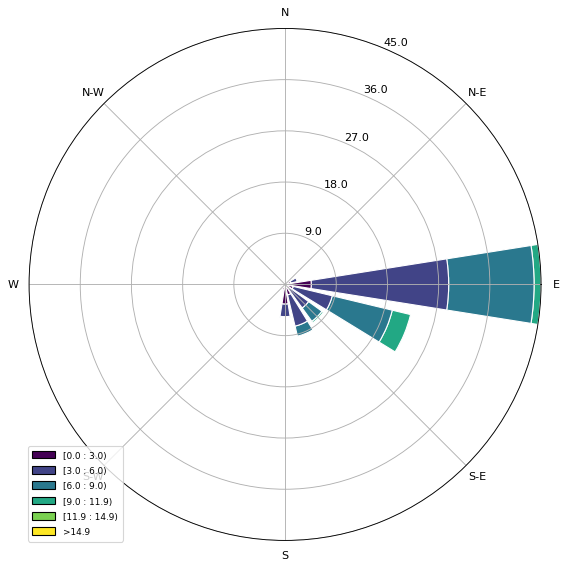

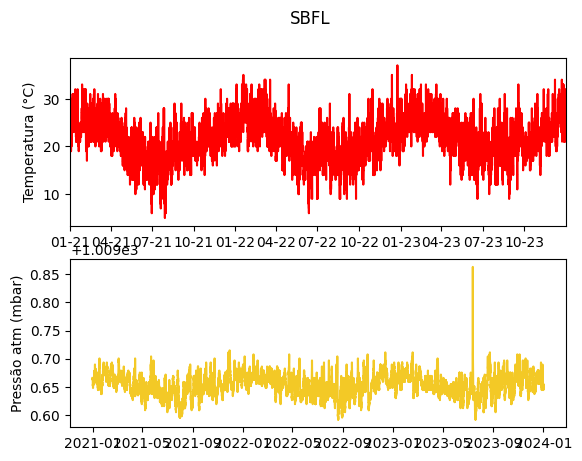

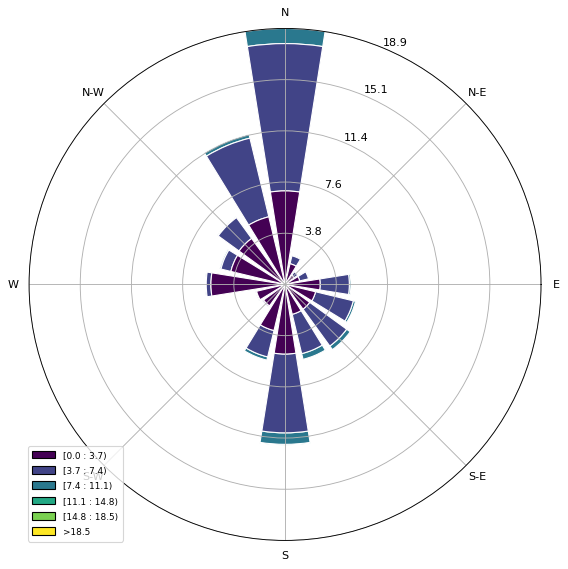

In [89]:
# Condicionando a leitura para apenas uma estação
for st in stations:
    dataAll = []
    print(st)
    for year in years:
        print(year)
        try:
            data = pd.read_csv(dataPath+'\\'+'metar_'+st+'_'+year+'.csv')
            dataAll.append(data)
        except:
            print('Não tem a estação ou o ano')
    
    # Concatenando a lista de dados
    dataAll = pd.concat(dataAll)
    dataAll['datetime'] = pd.to_datetime(dataAll[['year','month','day','hour']])
    dataAll = dataAll.drop_duplicates(subset='datetime', keep="first")
    dataAll = dataAll.set_index('datetime')
    statisticsAndFigures (dataAll,st,years,cwd)

# Trabalhando com data no python

Utilizaremos o pacote datetime e o pandas para trabalhar com datas. Lembrem que o correto é utilizar datas no formato ano, mês, dia, hora, minuto, segundo ou YYYYMMDDHH ou YYYY/MM/DD -hh:mm:ss

In [79]:
# Importanto pacote datetime
import datetime

In [82]:
date = datetime.datetime(2022,1,1,1,30,10)
print(date.year)
print(date.month)
print(date.day)
print(date.hour)
print(date.minute)
print(date.second)

2022
1
1
1
30
10


In [84]:
# Criando coluna datetime no meu dataframe
dataAll['datetime'] = pd.to_datetime(dataAll[['year','month','day','hour']])
dataAll.head()

,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
0,1,1,2021,0,NaN,190.0,3.601108,914.4,6.0,6.0,1009.665616,23.0,21.0,NaN,0.0,88.51,2021-01-01 00:00:00
1,1,1,2021,1,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,23.0,20.0,NaN,0.0,83.21,2021-01-01 01:00:00
2,1,1,2021,2,NaN,180.0,5.658884,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 02:00:00
3,1,1,2021,3,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 03:00:00
4,1,1,2021,4,NaN,190.0,4.629996,914.4,3.0,3.0,1009.662022,22.0,19.0,NaN,0.0,83.09,2021-01-01 04:00:00


In [87]:
# Verificando o tamanho da variável dataAll com e sem repetições

# tamanho original 
print('Este é o tamanho original')
print(dataAll.shape)
print('')

print('Este é o tamanho sem repetições de datas')
print(dataAll['datetime'].unique().shape)


Este é o tamanho original
(26251, 17)

Este é o tamanho sem repetições de datas
(26251,)


In [90]:
# Criando dataframe sem repetições
dataAll = dataAll.drop_duplicates(subset='datetime', keep="first")
print(dataAll.shape)
statisticsAndFigures(dataAll,st,years,cwd)

# Estabelecendo o índice do dataframe como datetime
dataAll = dataAll.set_index('datetime')
statisticsAndFigures(dataAll,st,years,cwd)

KeyError: Index(['datetime'], dtype='object')

In [91]:
# Criando coluna com mes do ano

dataAll['mes'] = dataAll.month
dataAll.head()

,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,mes
datetime,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,1,1,2021,0,NaN,190.0,3.601108,914.4,6.0,6.0,1009.665616,23.0,21.0,NaN,0.0,88.51,1
2021-01-01 01:00:00,1,1,2021,1,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,23.0,20.0,NaN,0.0,83.21,1
2021-01-01 02:00:00,1,1,2021,2,NaN,180.0,5.658884,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,1
2021-01-01 03:00:00,1,1,2021,3,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,1
2021-01-01 04:00:00,1,1,2021,4,NaN,190.0,4.629996,914.4,3.0,3.0,1009.662022,22.0,19.0,NaN,0.0,83.09,1


In [92]:
# Fazendo médias mensais

monthAverage = dataAll.groupby(['year','mes']).mean()

# Salvando em formato .csv em uma pasta que eu quero
os.makedirs(os.path.dirname(cwd)+'\\tabelas\\'+st,exist_ok = True)
monthAverage.to_csv(os.path.dirname(cwd)+'\\tabelas\\'+st+'\\monthAverage.csv')

In [93]:
# Fazendo médias mensais

monthMin = dataAll.groupby(['year','mes']).min()

# Salvando em formato .csv em uma pasta que eu quero
os.makedirs(os.path.dirname(cwd)+'\\tabelas\\'+st,exist_ok = True)
monthMin.to_csv(os.path.dirname(cwd)+'\\tabelas\\'+st+'\\monthMin.csv')